<a href="https://colab.research.google.com/github/dajley/IQR-Method/blob/main/IQR_on_North_Dakota_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Handling Outliers with IQR Method on Argricultural Dataset
#Code by Dajanique Leysath

In [ ]:
#imports libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mounts google drive to google colab
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#saves cvs file into dataframe
df = pd.read_csv('/content/drive/MyDrive/Datasets/Combined County Data Cleansed.csv')
df

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,104.9,60.9285,37.1985,49.0635,50.2490,50.8615,7.8580,23.1800,489.1580,0.1835,5.6170,1.3810,34.8855,46.0855
1,59.7,53.1395,31.8545,42.4970,47.2270,46.5050,9.8660,28.0395,447.4045,0.1910,5.8490,2.2715,30.7485,37.6335
2,43.0,60.1670,33.7200,46.9435,52.5145,51.8025,7.5750,23.9520,442.3180,0.2075,6.3380,2.1860,28.4045,44.6370
3,76.8,58.6490,32.1940,45.4220,52.1705,48.8195,8.3395,25.6365,488.8215,0.2055,6.2715,0.7400,30.5045,42.3990
4,94.9,57.2660,34.1885,45.7275,49.0000,47.4995,7.5190,23.1775,396.1995,0.1680,5.1335,2.2735,32.6630,42.4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,117.1,62.7390,36.9900,49.8645,51.3840,42.9890,10.7280,26.8820,511.3620,0.2350,7.1915,0.9650,36.1970,47.0220
282,39.7,60.0255,35.2670,47.6465,48.9125,43.6705,8.9215,23.2990,427.6245,0.1820,5.5765,2.5450,36.7735,44.8625
283,65.1,62.0395,35.7990,48.9195,50.1140,47.6505,10.8985,21.7265,448.2195,0.2285,6.9955,0.7300,34.6885,44.7150
284,98.6,63.8520,40.2650,52.0590,52.7185,51.1560,10.7980,21.0045,418.0985,0.1990,6.0710,2.3815,40.1690,48.5900


In [ ]:
#shows basic summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Value               286 non-null    float64
 1   Avg Max Temp        286 non-null    float64
 2   Avg Min Temp        286 non-null    float64
 3   Avg Temp            286 non-null    float64
 4   Avg Bare Soil Temp  286 non-null    float64
 5   Avg Turf Soil Temp  286 non-null    float64
 6   Avg Wind Speed      286 non-null    float64
 7   Avg Max Wind Speed  286 non-null    float64
 8   Total Solar Rad     286 non-null    float64
 9   Avg Penman PET      286 non-null    float64
 10  Total Penman PET    286 non-null    float64
 11  Total Rainfall      286 non-null    float64
 12  Avg Dew Point       286 non-null    float64
 13  Avg Wind Chill      286 non-null    float64
dtypes: float64(14)
memory usage: 31.4 KB


In [ ]:
#shows basic stats on dataset
df.describe()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,94.711538,59.099552,35.918376,47.506944,49.042607,46.393213,9.866484,25.079365,448.886152,0.198280,6.067767,1.883360,34.407533,43.819885
std,35.748752,3.773902,2.773045,3.045846,3.455934,4.063401,1.259208,2.396947,32.467450,0.027049,0.827335,1.055247,3.096325,3.926210
min,25.400000,49.942500,29.261500,40.661500,39.873500,36.401000,7.519000,18.379000,362.750000,0.138500,4.244000,0.192500,26.804500,34.539500
25%,66.300000,56.588000,33.665750,45.205000,46.461250,43.298375,9.031375,23.834875,427.737875,0.180500,5.535125,0.970000,32.714625,40.730250
50%,92.450000,59.881250,35.962750,47.671000,49.115000,46.565250,9.871500,25.149250,446.897000,0.202250,6.168250,1.707250,34.651500,44.318750
75%,120.625000,61.739375,37.861125,49.736500,51.818000,49.457000,10.669875,26.591375,475.160500,0.218500,6.685500,2.514125,36.387750,46.477000
max,198.000000,67.994000,42.368500,54.553000,57.404000,55.556000,14.441500,36.001000,536.538000,0.248500,7.669000,6.194500,42.040500,52.869500


In [ ]:
#used to find if there were any null values
df.isnull().sum()

,0
Value,0
Avg Max Temp,0
Avg Min Temp,0
Avg Temp,0
Avg Bare Soil Temp,0
Avg Turf Soil Temp,0
Avg Wind Speed,0
Avg Max Wind Speed,0
Total Solar Rad,0
Avg Penman PET,0


In [ ]:
#shows how many unique values are in each feature
df.nunique()

,0
Value,250
Avg Max Temp,198
Avg Min Temp,198
Avg Temp,197
Avg Bare Soil Temp,197
Avg Turf Soil Temp,197
Avg Wind Speed,194
Avg Max Wind Speed,195
Total Solar Rad,198
Avg Penman PET,132


In [ ]:
#shows how correlated each feature is to each other
df.corr()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
Value,1.000000,-0.114121,0.017959,-0.061331,-0.228821,-0.332270,0.027308,0.109507,-0.150490,-0.207645,-0.206967,0.179414,0.136577,-0.067075
Avg Max Temp,-0.114121,1.000000,0.724030,0.949316,0.849990,0.684369,-0.224368,-0.247643,0.290263,0.738079,0.737178,-0.135603,0.382225,0.957011
Avg Min Temp,0.017959,0.724030,1.000000,0.903980,0.606540,0.583659,-0.111692,-0.297559,-0.096499,0.249618,0.249573,0.225344,0.791173,0.858445
Avg Temp,-0.061331,0.949316,0.903980,1.000000,0.803402,0.690781,-0.189896,-0.287289,0.136503,0.571274,0.570678,0.018768,0.596849,0.984258
Avg Bare Soil Temp,-0.228821,0.849990,0.606540,0.803402,1.000000,0.799243,-0.279467,-0.188760,0.319015,0.633735,0.632258,-0.141759,0.301400,0.837696
Avg Turf Soil Temp,-0.332270,0.684369,0.583659,0.690781,0.799243,1.000000,-0.287460,-0.211398,0.214323,0.486544,0.486589,-0.068161,0.245580,0.721284
Avg Wind Speed,0.027308,-0.224368,-0.111692,-0.189896,-0.279467,-0.287460,1.000000,0.647293,-0.093411,0.079313,0.078896,0.215829,-0.033135,-0.317008
Avg Max Wind Speed,0.109507,-0.247643,-0.297559,-0.287289,-0.188760,-0.211398,0.647293,1.000000,0.065805,0.141740,0.136886,0.051453,-0.327432,-0.332997
Total Solar Rad,-0.150490,0.290263,-0.096499,0.136503,0.319015,0.214323,-0.093411,0.065805,1.000000,0.602456,0.609541,-0.464572,-0.285443,0.162490
Avg Penman PET,-0.207645,0.738079,0.249618,0.571274,0.633735,0.486544,0.079313,0.141740,0.602456,1.000000,0.999686,-0.314908,-0.221080,0.579469


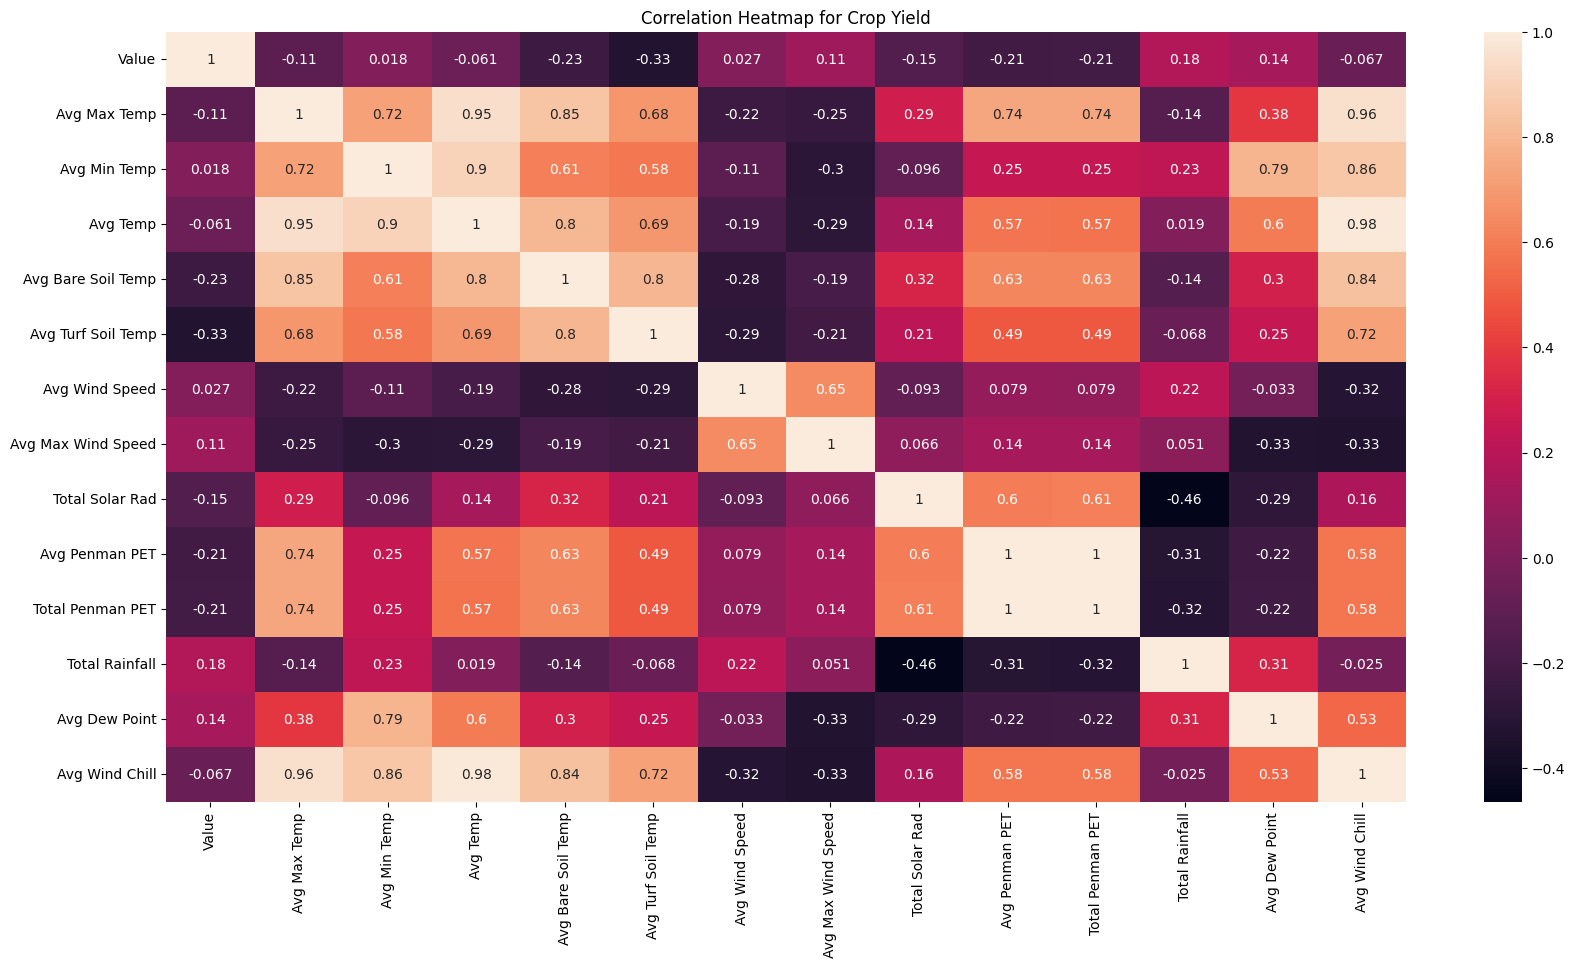

In [ ]:
#shows heatmap of correlation between features
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap for Crop Yield")

#adjusts size of heatmap
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

Correlation strengths (direction does not matter):

Strong Correlation: x > 0.5
Moderate Correlation: 0.3 < x < 0.5
Weak Correlation: x < 0.3
Which features are most correlated with crop yield?

Moderate Correlation:

*   Avg Turf Soil Temp

Weak Correlation:

*   Avg Bare Soil Temp
*   Avg Penman PET
*   Total Penman PET
*   Total Rainfall
*   Avg Dew Point
*   Avg Max Temp
*   Avg Max Wind Speed

Are there missing values or outliers in key variables (e.g., soil pH, rainfall)?

Are there interactions between features (e.g., temperature + rainfall)?

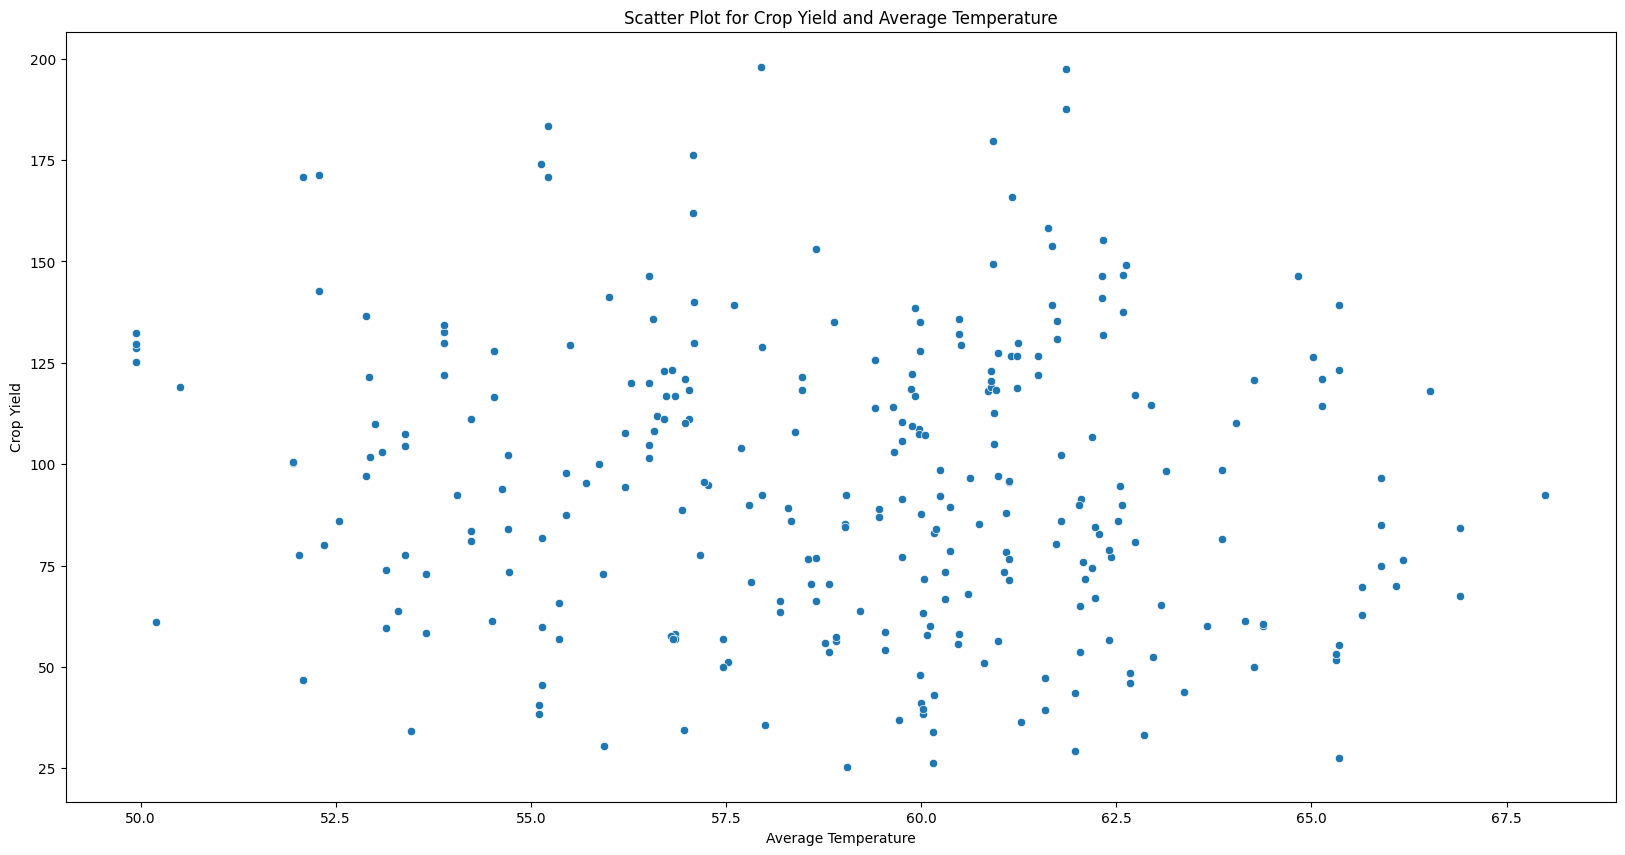

In [ ]:
#creates scatterplot for Avg Min Temp and Crop Value (lowest correlation)
sns.scatterplot( data=df, x='Avg Max Temp', y='Value')

plt.title('Scatter Plot for Crop Yield and Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Crop Yield')

plt.show()

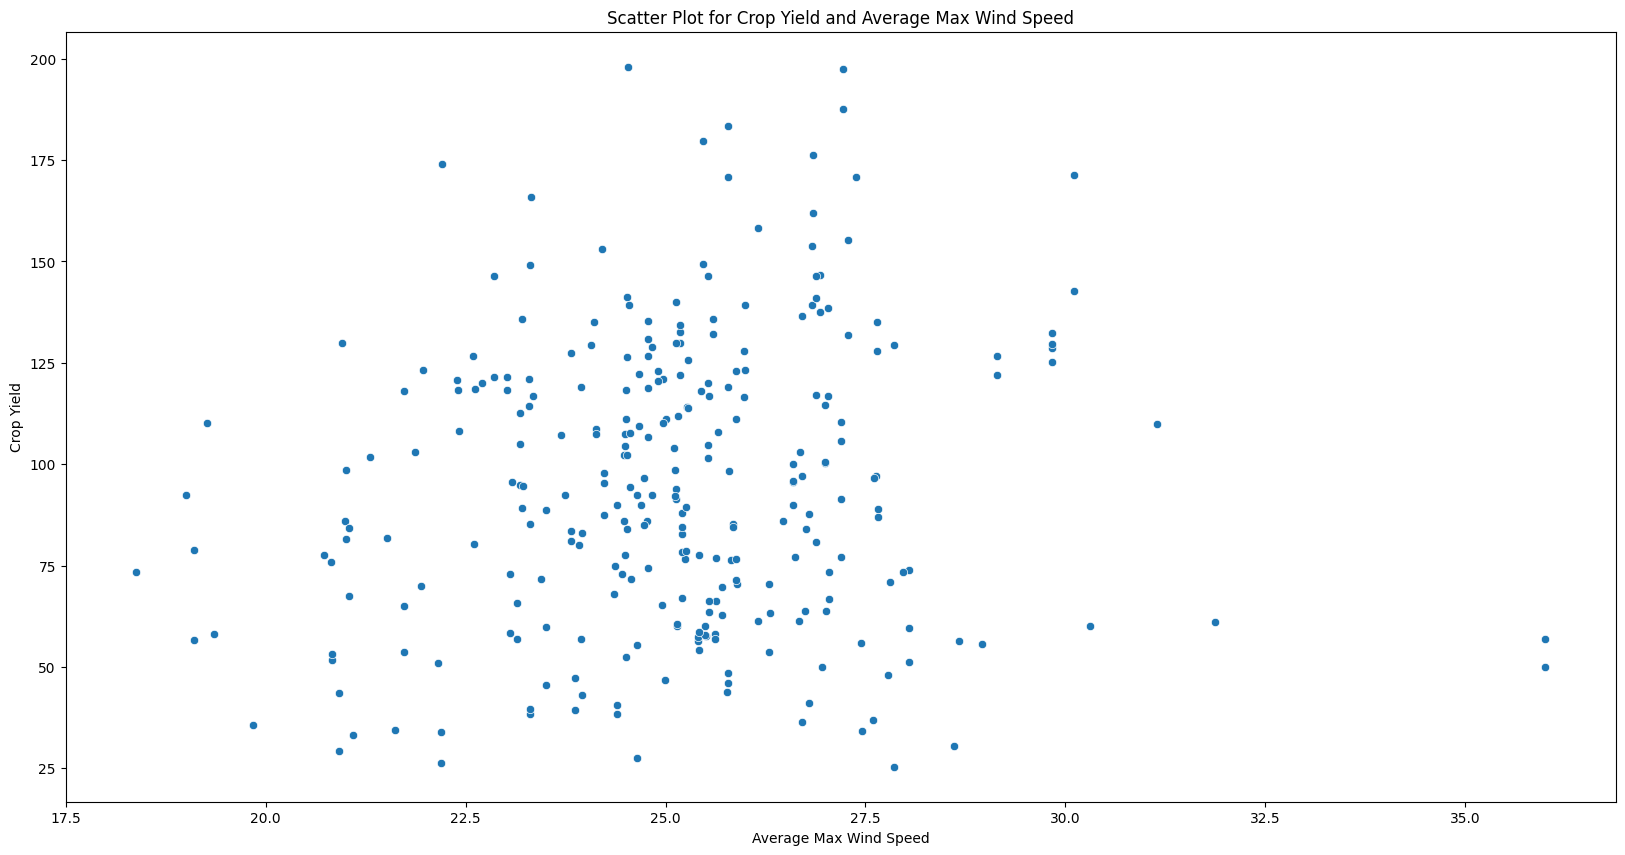

In [ ]:
#creates scatterplot for Avg Max Wnd Speed and Crop Value (low correlation)
sns.scatterplot( data=df, x='Avg Max Wind Speed', y='Value')

plt.title('Scatter Plot for Crop Yield and Average Max Wind Speed')
plt.xlabel('Average Max Wind Speed')
plt.ylabel('Crop Yield')

plt.show()

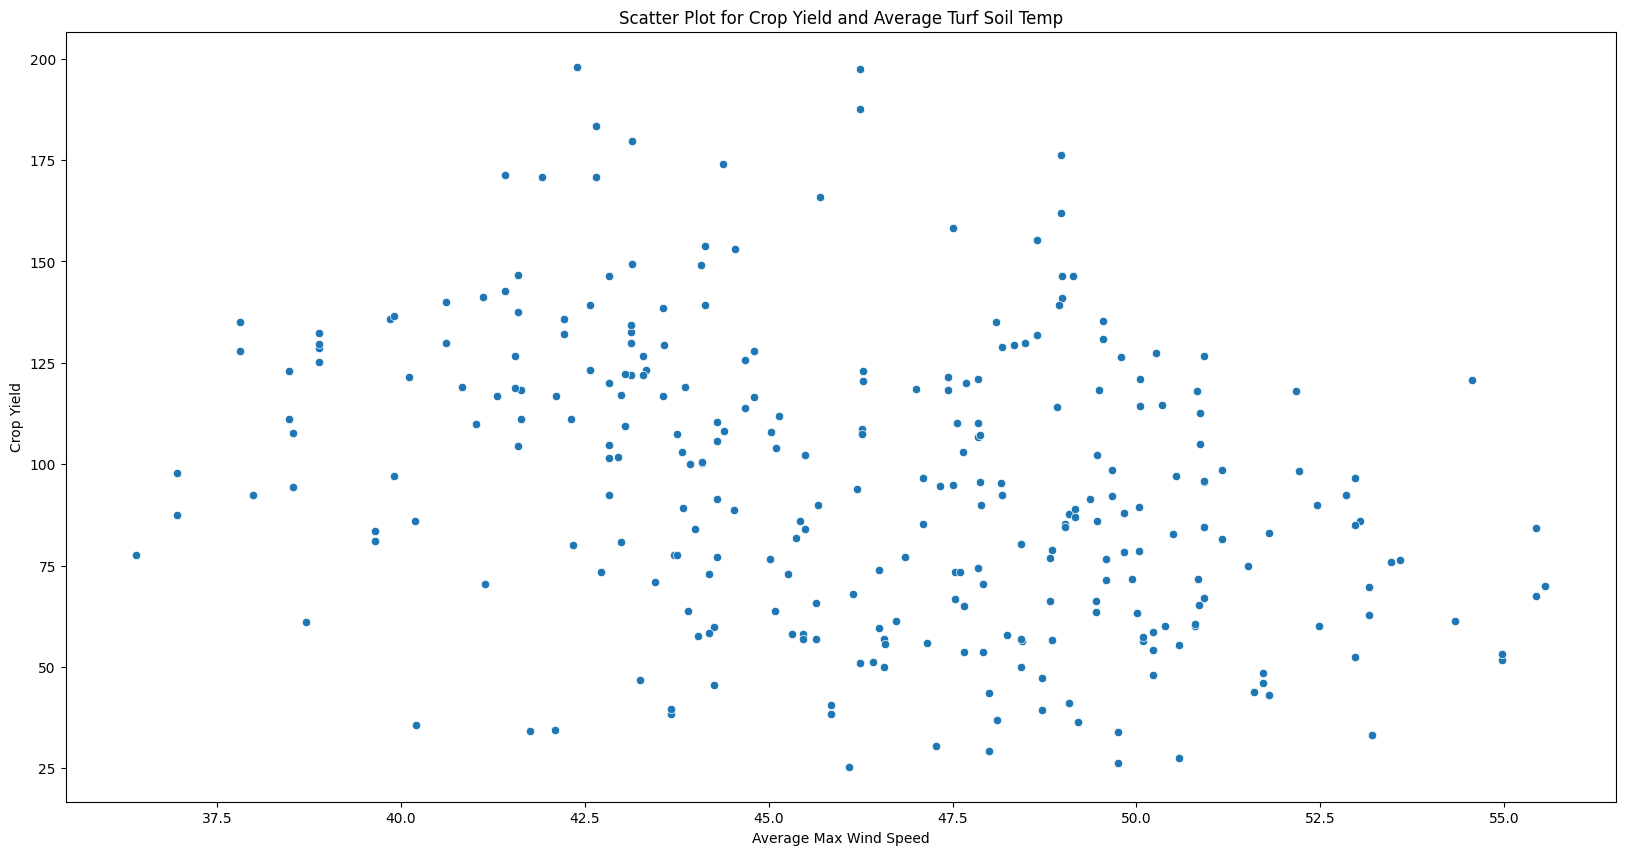

In [ ]:
#creates scatterplot for Avg Turf Soil Temp and Crop Value (highest correlation)
sns.scatterplot( data=df, x='Avg Turf Soil Temp', y='Value')

plt.title('Scatter Plot for Crop Yield and Average Turf Soil Temp')
plt.xlabel('Average Max Wind Speed')
plt.ylabel('Crop Yield')

plt.show()

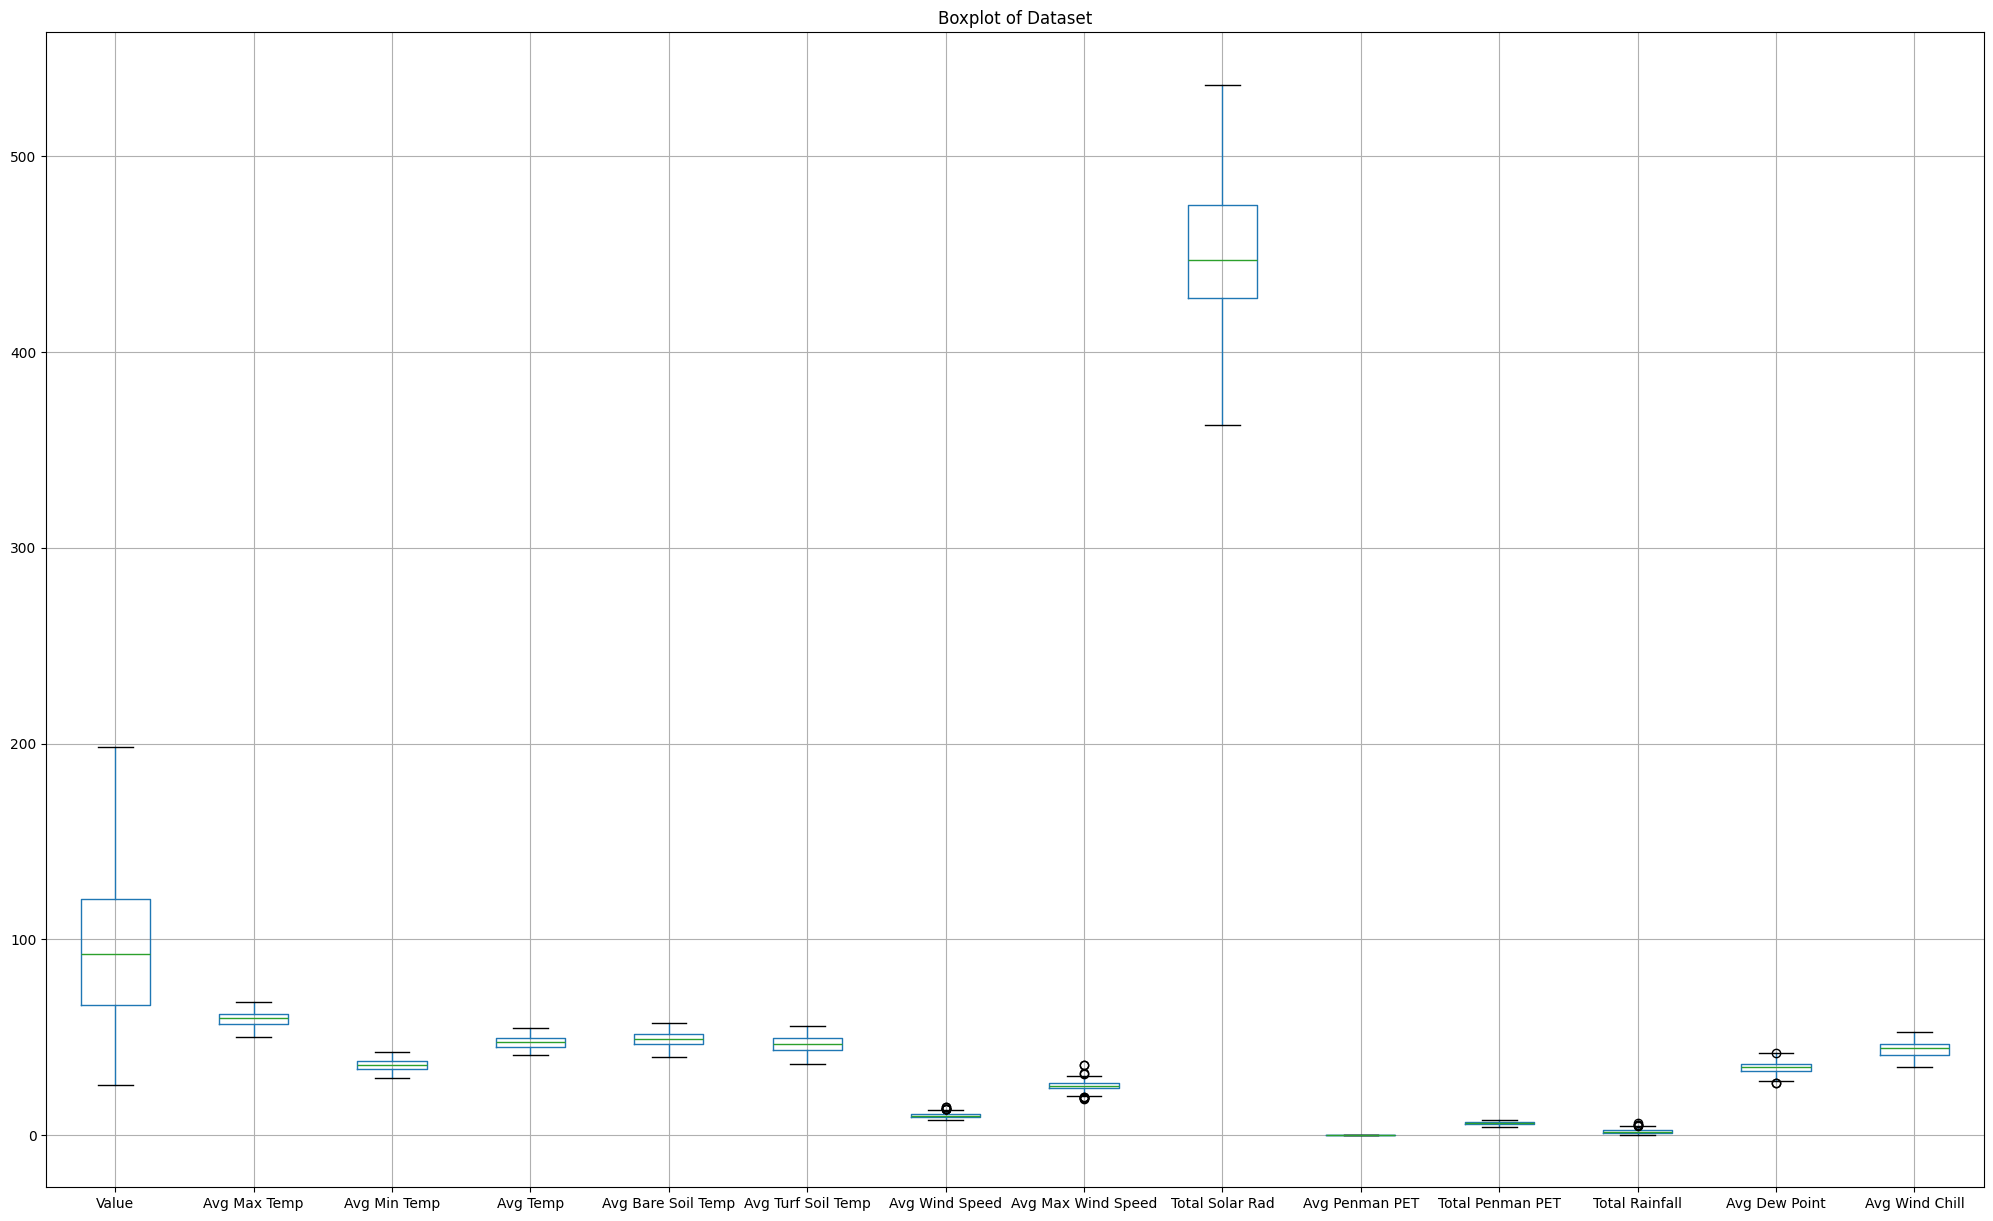

In [ ]:
#shows a boxplot of dataset to detect outliers
df.boxplot(figsize=(25,15))
plt.title('Boxplot of Dataset')
plt.show()

Interquartile Range (IQR) method identifies outliers by measuring the spread between the first quartile (Q1) and third quartile (Q3). Any data point below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.

In [ ]:
# Uses IQR to detect outliers for Avg Max Wind Speed
Q1 = np.percentile(df['Avg Max Wind Speed'], 25, method='midpoint')
Q3 = np.percentile(df['Avg Max Wind Speed'], 75, method='midpoint')
IQR = Q3 - Q1
print("IQR:", IQR)

# Above Upper bound for Avg Max Wind Speed
upper = Q3+1.5*IQR
upper_array = np.array(df['Avg Max Wind Speed'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound for Avg Max Wind Speed
lower = Q1-1.5*IQR
lower_array = np.array(df['Avg Max Wind Speed'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

IQR: 2.7439999999999998
Upper Bound: 30.70675
4
Lower Bound: 19.73075
6


In [ ]:
# Uses IQR to detect outliers for Avg Wind Speed
Q1 = np.percentile(df['Avg Wind Speed'], 25, method='midpoint')
Q3 = np.percentile(df['Avg Wind Speed'], 75, method='midpoint')
IQR = Q3 - Q1
print("IQR:", IQR)

# Above Upper bound for Avg Wind Speed
upper = Q3+1.5*IQR
upper_array = np.array(df['Avg Wind Speed'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound for Avg Wind Speed
lower = Q1-1.5*IQR
lower_array = np.array(df['Avg Wind Speed'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

IQR: 1.6364999999999998
Upper Bound: 13.124500000000001
7
Lower Bound: 6.578500000000001
0


In [ ]:
# Uses IQR to detect outliers for Total Rainfall
Q1 = np.percentile(df['Total Rainfall'], 25, method='midpoint')
Q3 = np.percentile(df['Total Rainfall'], 75, method='midpoint')
IQR = Q3 - Q1
print("IQR:", IQR)

# Above Upper bound for Total Rainfall
upper = Q3+1.5*IQR
upper_array = np.array(df['Total Rainfall'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound for Total Rainfall
lower = Q1-1.5*IQR
lower_array = np.array(df['Total Rainfall'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

IQR: 1.5287500000000003
Upper Bound: 4.791875000000001
5
Lower Bound: -1.3231250000000003
0


In [ ]:
# Uses IQR to detect outliers for Avg Dew Point
Q1 = np.percentile(df['Avg Dew Point'], 25, method='midpoint')
Q3 = np.percentile(df['Avg Dew Point'], 75, method='midpoint')
IQR = Q3 - Q1
print("IQR:", IQR)

# Above Upper bound for Avg Dew Point
upper = Q3+1.5*IQR
upper_array = np.array(df['Avg Dew Point'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound for Avg Dew Point
lower = Q1-1.5*IQR
lower_array = np.array(df['Avg Dew Point'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

IQR: 3.612250000000003
Upper Bound: 41.76437500000001
1
Lower Bound: 27.315374999999996
2


In some cases outliers can be replaced with statistical measures like mean or median to reduce their impact without losing data. Median is often preferred because it is less affected by extreme values.

In [ ]:
#Replaces outliers with median for Avg Max Wind Speed
df['Avg Max Wind Speed'] = np.where((df['Avg Max Wind Speed'] < lower_array) | (df['Avg Max Wind Speed'] > upper_array), df['Avg Max Wind Speed'].median(), df['Avg Max Wind Speed'])
print("Data after Replacing Outliers:\n\n", df)

Data after Replacing Outliers:

      Value  Avg Max Temp  Avg Min Temp  Avg Temp  Avg Bare Soil Temp  \
0    104.9       60.9285       37.1985   49.0635             50.2490   
1     59.7       53.1395       31.8545   42.4970             47.2270   
2     43.0       60.1670       33.7200   46.9435             52.5145   
3     76.8       58.6490       32.1940   45.4220             52.1705   
4     94.9       57.2660       34.1885   45.7275             49.0000   
..     ...           ...           ...       ...                 ...   
281  117.1       62.7390       36.9900   49.8645             51.3840   
282   39.7       60.0255       35.2670   47.6465             48.9125   
283   65.1       62.0395       35.7990   48.9195             50.1140   
284   98.6       63.8520       40.2650   52.0590             52.7185   
285   84.3       66.9080       39.7150   53.3110             55.6660   

     Avg Turf Soil Temp  Avg Wind Speed  Avg Max Wind Speed  Total Solar Rad  \
0               50.861

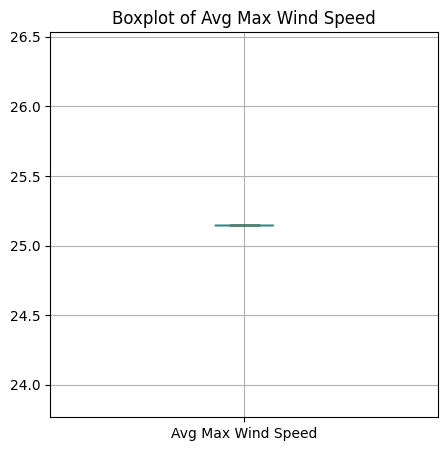

In [ ]:
#boxplot on Avg Max Wind Speed
df.boxplot(column='Avg Max Wind Speed', figsize=(5,5))
plt.title('Boxplot of Avg Max Wind Speed')
plt.show()

In [ ]:
#Replaces outliers with median for Avg Wind Speed
df['Avg Wind Speed'] = np.where((df['Avg Wind Speed'] < lower_array) | (df['Avg Wind Speed'] > upper_array), df['Avg Wind Speed'].median(), df['Avg Wind Speed'])
print("Data after Replacing Outliers:\n\n", df)

Data after Replacing Outliers:

      Value  Avg Max Temp  Avg Min Temp  Avg Temp  Avg Bare Soil Temp  \
0    104.9       60.9285       37.1985   49.0635             50.2490   
1     59.7       53.1395       31.8545   42.4970             47.2270   
2     43.0       60.1670       33.7200   46.9435             52.5145   
3     76.8       58.6490       32.1940   45.4220             52.1705   
4     94.9       57.2660       34.1885   45.7275             49.0000   
..     ...           ...           ...       ...                 ...   
281  117.1       62.7390       36.9900   49.8645             51.3840   
282   39.7       60.0255       35.2670   47.6465             48.9125   
283   65.1       62.0395       35.7990   48.9195             50.1140   
284   98.6       63.8520       40.2650   52.0590             52.7185   
285   84.3       66.9080       39.7150   53.3110             55.6660   

     Avg Turf Soil Temp  Avg Wind Speed  Avg Max Wind Speed  Total Solar Rad  \
0               50.861

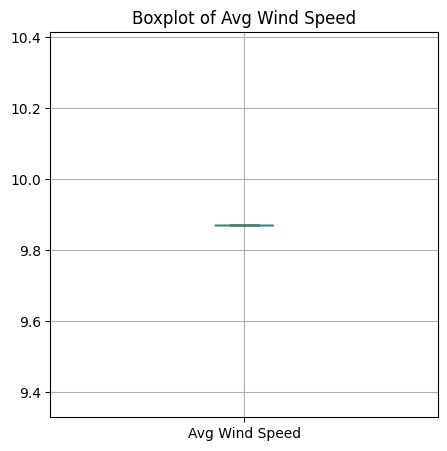

In [ ]:
#boxplot on Avg Wind Speed
df.boxplot(column='Avg Wind Speed', figsize=(5,5))
plt.title('Boxplot of Avg Wind Speed')
plt.show()

In [ ]:
#Replaces outliers with median for Total Rainfall
df['Total Rainfall'] = np.where((df['Total Rainfall'] < lower_array) | (df['Total Rainfall'] > upper_array), df['Total Rainfall'].median(), df['Total Rainfall'])
print("Data after Replacing Outliers:\n\n", df)

Data after Replacing Outliers:

      Value  Avg Max Temp  Avg Min Temp  Avg Temp  Avg Bare Soil Temp  \
0    104.9       60.9285       37.1985   49.0635             50.2490   
1     59.7       53.1395       31.8545   42.4970             47.2270   
2     43.0       60.1670       33.7200   46.9435             52.5145   
3     76.8       58.6490       32.1940   45.4220             52.1705   
4     94.9       57.2660       34.1885   45.7275             49.0000   
..     ...           ...           ...       ...                 ...   
281  117.1       62.7390       36.9900   49.8645             51.3840   
282   39.7       60.0255       35.2670   47.6465             48.9125   
283   65.1       62.0395       35.7990   48.9195             50.1140   
284   98.6       63.8520       40.2650   52.0590             52.7185   
285   84.3       66.9080       39.7150   53.3110             55.6660   

     Avg Turf Soil Temp  Avg Wind Speed  Avg Max Wind Speed  Total Solar Rad  \
0               50.861

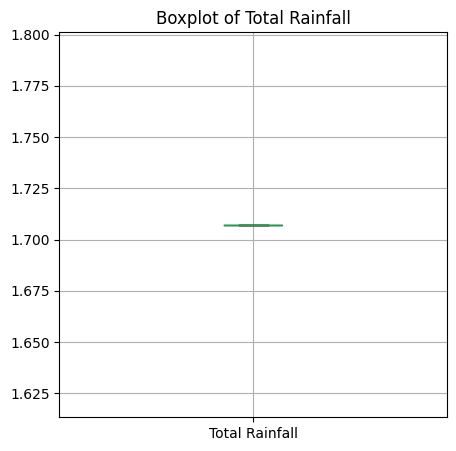

In [ ]:
#boxplot on Total Rainfall
df.boxplot(column='Total Rainfall', figsize=(5,5))
plt.title('Boxplot of Total Rainfall')
plt.show()

In [ ]:
#Replaces outliers with median for Avg Dew Point
df['Avg Dew Point'] = np.where((df['Avg Dew Point'] < lower_array) | (df['Avg Dew Point'] > upper_array), df['Avg Dew Point'].median(), df['Avg Dew Point'])
print("Data after Replacing Outliers:\n\n", df)

Data after Replacing Outliers:

      Value  Avg Max Temp  Avg Min Temp  Avg Temp  Avg Bare Soil Temp  \
0    104.9       60.9285       37.1985   49.0635             50.2490   
1     59.7       53.1395       31.8545   42.4970             47.2270   
2     43.0       60.1670       33.7200   46.9435             52.5145   
3     76.8       58.6490       32.1940   45.4220             52.1705   
4     94.9       57.2660       34.1885   45.7275             49.0000   
..     ...           ...           ...       ...                 ...   
281  117.1       62.7390       36.9900   49.8645             51.3840   
282   39.7       60.0255       35.2670   47.6465             48.9125   
283   65.1       62.0395       35.7990   48.9195             50.1140   
284   98.6       63.8520       40.2650   52.0590             52.7185   
285   84.3       66.9080       39.7150   53.3110             55.6660   

     Avg Turf Soil Temp  Avg Wind Speed  Avg Max Wind Speed  Total Solar Rad  \
0               50.861

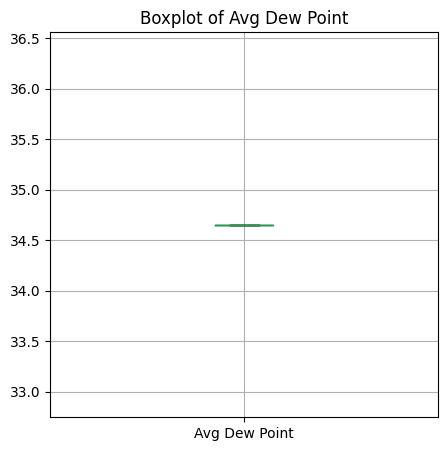

In [ ]:
#boxplot on Avg Dew Point
df.boxplot(column='Avg Dew Point', figsize=(5,5))
plt.title('Boxplot of Avg Dew Point')
plt.show()

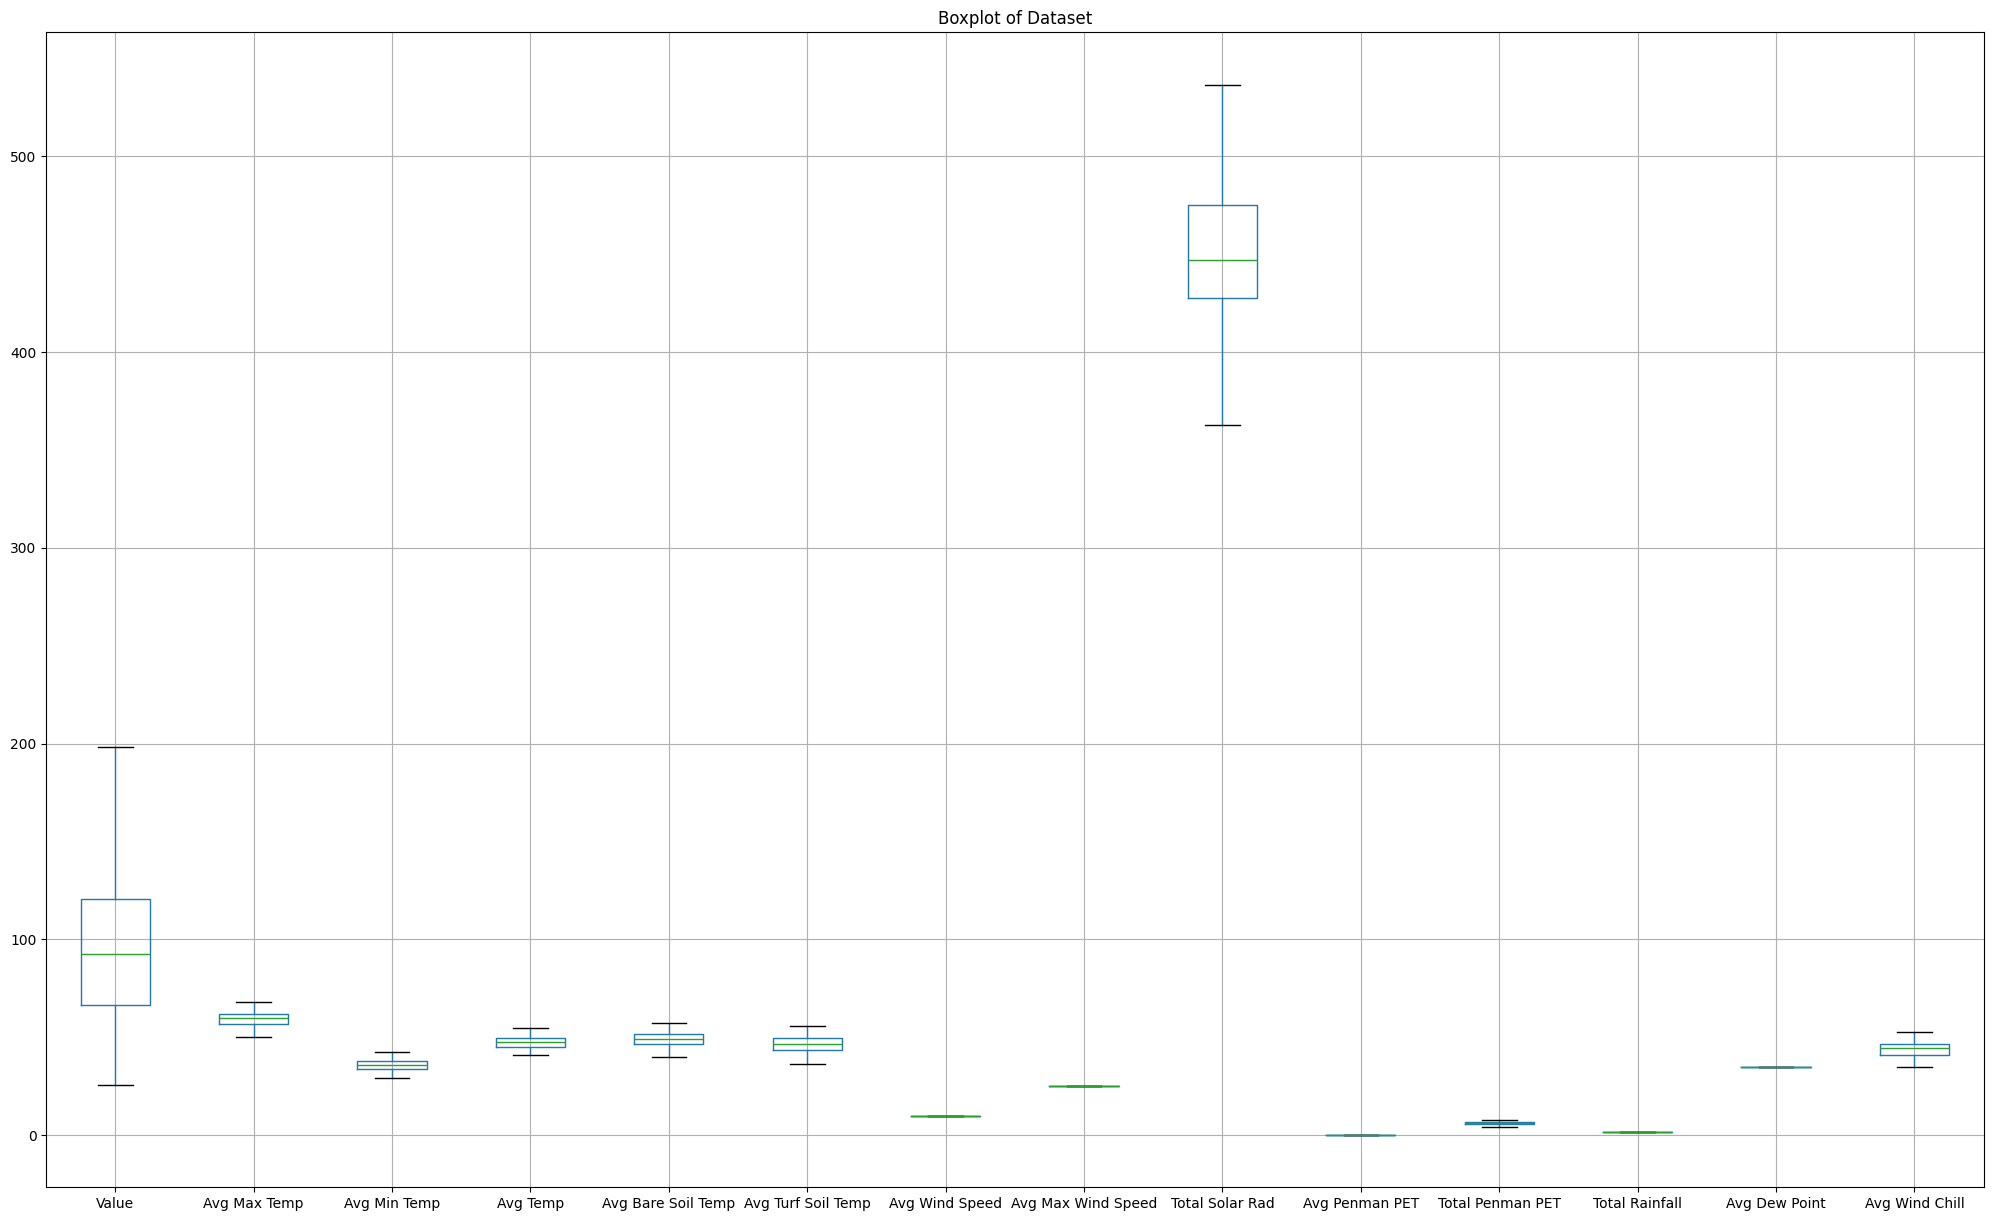

In [ ]:
#shows a boxplot of dataset to detect outliers
df.boxplot(figsize=(25,15))
plt.title('Boxplot of Dataset')
plt.show()

In [ ]:
df.describe()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,2.860000e+02,2.860000e+02,286.000000,286.000000,286.000000,2.860000e+02,2.860000e+02,286.000000
mean,94.711538,59.099552,35.918376,47.506944,49.042607,46.393213,9.871500e+00,2.514925e+01,448.886152,0.198280,6.067767,1.707250e+00,3.465150e+01,43.819885
std,35.748752,3.773902,2.773045,3.045846,3.455934,4.063401,3.736888e-14,1.459166e-13,32.467450,0.027049,0.827335,8.897353e-15,4.982517e-14,3.926210
min,25.400000,49.942500,29.261500,40.661500,39.873500,36.401000,9.871500e+00,2.514925e+01,362.750000,0.138500,4.244000,1.707250e+00,3.465150e+01,34.539500
25%,66.300000,56.588000,33.665750,45.205000,46.461250,43.298375,9.871500e+00,2.514925e+01,427.737875,0.180500,5.535125,1.707250e+00,3.465150e+01,40.730250
50%,92.450000,59.881250,35.962750,47.671000,49.115000,46.565250,9.871500e+00,2.514925e+01,446.897000,0.202250,6.168250,1.707250e+00,3.465150e+01,44.318750
75%,120.625000,61.739375,37.861125,49.736500,51.818000,49.457000,9.871500e+00,2.514925e+01,475.160500,0.218500,6.685500,1.707250e+00,3.465150e+01,46.477000
max,198.000000,67.994000,42.368500,54.553000,57.404000,55.556000,9.871500e+00,2.514925e+01,536.538000,0.248500,7.669000,1.707250e+00,3.465150e+01,52.869500
